In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
from tqdm import tqdm

api = wandb.Api()
ENT = "TomFrederik"
PROJ = "MT-ToyTask-Ours"
JOB_ID = "9735345" #NOTE <-- change this for new runs

def gen_run_id_list(job_id):
    my_list = []
    for setting_num in range(21):
        for seed_num in range(3):
            my_list.append(f"setting_{setting_num}_seed_{seed_num}_job_{job_id}")
    return my_list

def fetch_last_loss(run_id: str, loss_name: str = "tuning_loss") -> float:
    run = api.run(f"{ENT}/{PROJ}/{run_id}")
    return run.history(keys=[f'Validation/{loss_name}']).iloc[-1][f'Validation/{loss_name}']


def fetch_loss_list_per_setting(job_id, loss_name: str = "tuning_loss"):
    out_dict = dict()
    for setting_num in tqdm(range(21)):
        loss_list = []
        for seed_num in range(3):
            run_id = f"setting_{setting_num}_seed_{seed_num}_job_{job_id}"
            loss = fetch_last_loss(run_id, loss_name)
            loss_list.append(loss)
        out_dict[setting_num] = loss_list
    return out_dict

def compute_mean_std_per_setting(loss_dict):
    out_dict = dict()
    for key, val in loss_dict.items():
        mean = np.mean(val)
        std = np.std(val, ddof=1)
        out_dict[key] = (mean, std)
    return out_dict

In [2]:
# run id lists per setting
no_05 = [2, 4, 6]
yes_05 = [0, 1, 3, 5]
no_075 = [9, 11, 13]
yes_075 = [7, 8, 10, 12]
no_1 = [16, 18, 20]
yes_1 = [14, 15, 17, 19]

In [3]:
loss_name = "value_prefix_loss"
# loss_name = "tuning_loss"
mean_std_per_setting = compute_mean_std_per_setting(fetch_loss_list_per_setting(JOB_ID, loss_name))

100%|██████████| 21/21 [00:39<00:00,  1.90s/it]


In [4]:
print(mean_std_per_setting)

{0: (7.372245232772912e-05, 0.00011138995002724127), 1: (0.034933105732003845, 0.014603351872444352), 2: (0.007858656502018372, 0.0011907207785807848), 3: (0.06785362338026364, 0.02439653265325262), 4: (0.026270337402820587, 0.010757665858628562), 5: (0.17160145938396454, 0.03602723818886801), 6: (0.04972107211748759, 0.006742656259857025), 7: (0.007625675752630438, 0.013206976283080752), 8: (0.01202523991620789, 0.016782064007483038), 9: (0.009295070301353311, 0.015287489270196065), 10: (0.021036131773144007, 0.02292308991288663), 11: (0.01057951672313114, 0.014010544039449391), 12: (0.08404523755113284, 0.04315864033574343), 13: (0.03362984303385019, 0.020716195742294406), 14: (5.163583561322109e-06, 4.262985179212564e-06), 15: (0.0025207333577175937, 0.0005015477417038262), 16: (0.0011014130820209782, 0.0003591961116152813), 17: (0.010583469023307165, 0.0009689697867194301), 18: (0.016718899520734947, 0.006994895483379127), 19: (0.07183340564370155, 0.010589967075847365), 20: (0.021

In [5]:
test_only_true_view_05 = [mean_std_per_setting[key] for key in yes_05]
test_only_true_view_075 = [mean_std_per_setting[key] for key in yes_075]
test_only_true_view_1 = [mean_std_per_setting[key] for key in yes_1]

test_only_false_view_05 = [mean_std_per_setting[key] for key in no_05]
test_only_false_view_075 = [mean_std_per_setting[key] for key in no_075]
test_only_false_view_1 = [mean_std_per_setting[key] for key in no_1]

In [6]:
print(test_only_true_view_05)

[(7.372245232772912e-05, 0.00011138995002724127), (0.034933105732003845, 0.014603351872444352), (0.06785362338026364, 0.02439653265325262), (0.17160145938396454, 0.03602723818886801)]


In [7]:
xticks_yes = np.array([0, 0.1, 0.2, 0.5])
xticks_no = np.array([0.1, 0.2, 0.5])
plot_kwargs = dict(width=0.025, capsize=4)

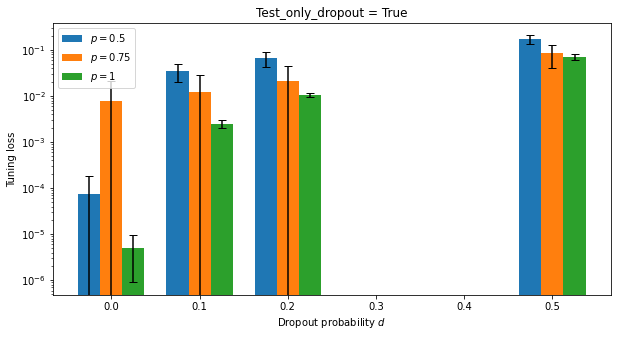

In [8]:
# eval for test_only true
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(xticks_yes-0.025, [x[0] for x in test_only_true_view_05], yerr=[x[1] for x in test_only_true_view_05], label=r"$p=0.5$", **plot_kwargs)
ax.bar(xticks_yes, [x[0] for x in test_only_true_view_075], yerr=[x[1] for x in test_only_true_view_075], label=r"$p=0.75$", **plot_kwargs)
ax.bar(xticks_yes+0.025, [x[0] for x in test_only_true_view_1], yerr=[x[1] for x in test_only_true_view_1], label=r"$p=1$", **plot_kwargs)
plt.title("Test_only_dropout = True")
plt.xlabel(r"Dropout probability $d$")
plt.yscale("log")
plt.ylabel("Tuning loss")
plt.legend()

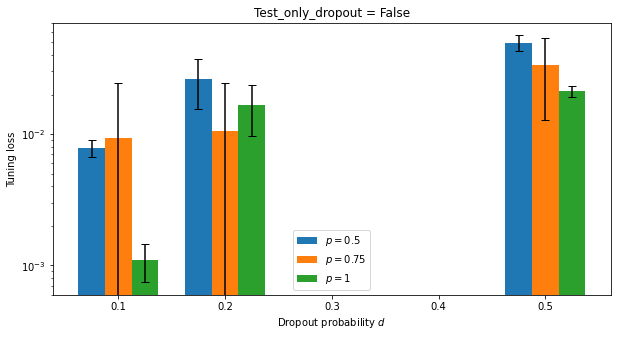

In [9]:
# eval for test_only false
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(xticks_no-0.025, [x[0] for x in test_only_false_view_05], yerr=[x[1] for x in test_only_false_view_05], label=r"$p=0.5$", **plot_kwargs)
ax.bar(xticks_no, [x[0] for x in test_only_false_view_075], yerr=[x[1] for x in test_only_false_view_075], label=r"$p=0.75$", **plot_kwargs)
ax.bar(xticks_no+0.025, [x[0] for x in test_only_false_view_1], yerr=[x[1] for x in test_only_false_view_1], label=r"$p=1$", **plot_kwargs)
plt.title("Test_only_dropout = False")
plt.yscale("log")
plt.xlabel(r"Dropout probability $d$")
plt.ylabel("Tuning loss")
plt.legend()